In [39]:
import pandas as pd
from pandas_profiling import ProfileReport
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', None)
pd.set_option('mode.chained_assignment',None)

In [40]:
import pandas as pd
import numpy as np 

In [41]:
import random as randint


In [42]:
import matplotlib as plt
%matplotlib inline
import seaborn as sns

In [43]:
import scipy as stats

In [44]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.feature_selection import SelectFromModel


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [46]:
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier

In [47]:
from sklearn.metrics import classification_report
from yellowbrick.classifier import PrecisionRecallCurve
from xgboost import to_graphviz, plot_importance

In [48]:
from imblearn.over_sampling import SMOTE

In [49]:
import warnings 
warnings.filterwarnings(action="ignore")

In [50]:
LINK = 'https://storage.googleapis.com/industryanalytics/LoanDefaultData.csv'

In [51]:
def load_default_data(link=LINK):
    return pd.read_csv(filepath_or_buffer = link)

In [52]:
data = load_default_data()
print('Data Shape: ',data.shape)
data.head()

Data Shape:  (887379, 22)


,cust_id,year,state,date_issued,date_final,emp_duration,own_type,income_type,app_type,loan_purpose,interest_payments,grade,annual_pay,loan_amount,interest_rate,loan_duration,dti,total_pymnt,total_rec_prncp,recoveries,installment,is_default
0,180675,2007,Andhra Pradesh,01/12/2007,1032009,10.0,MORTGAGE,Low,INDIVIDUAL,debt_consolidation,Low,C,73000,25000,10.91,36 months,22.13,13650.38,8767.32,2207.65,817.41,1
1,85781,2007,Rajasthan,01/06/2007,1072010,0.5,RENT,Low,INDIVIDUAL,other,Low,C,40000,1400,10.91,36 months,8.61,1663.04,1400.00,0.00,45.78,0
2,85675,2007,Manipur,01/06/2007,1062010,10.0,RENT,Low,INDIVIDUAL,other,High,E,25000,1000,14.07,36 months,16.27,1231.38,1000.00,0.00,34.21,0
3,84918,2007,Andhra Pradesh,01/09/2007,1042008,10.0,MORTGAGE,Low,INDIVIDUAL,other,Low,A,65000,5000,7.43,36 months,0.28,5200.44,5000.00,0.00,155.38,0
4,84670,2007,Arunachal Pradesh,01/06/2007,1082009,10.0,MORTGAGE,High,INDIVIDUAL,other,Low,A,300000,5000,7.75,36 months,5.38,5565.65,5000.00,0.00,156.11,0


In [53]:
print('Describe your feature Length:' , len(data.describe().columns))

Describe your feature Length: 13


In [54]:
data.describe()

,cust_id,year,date_final,emp_duration,annual_pay,loan_amount,interest_rate,dti,total_pymnt,total_rec_prncp,recoveries,installment,is_default
count,8.873790e+05,887379.000000,8.873790e+05,887379.000000,8.873790e+05,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000
mean,3.246513e+07,2014.021761,1.047089e+06,6.050564,7.502759e+04,14755.264605,13.246740,18.157039,7558.826684,5757.706424,45.919243,436.717127,0.075987
std,2.282734e+07,1.261741,4.555149e+04,3.507405,6.469815e+04,8435.455601,4.381867,17.190626,7871.243336,6625.441046,409.693874,244.186593,0.264977
min,5.473400e+04,2007.000000,1.012008e+06,0.500000,0.000000e+00,500.000000,5.320000,0.000000,0.000000,0.000000,0.000000,15.670000,0.000000
25%,9.206643e+06,2013.000000,1.012016e+06,3.000000,4.500000e+04,8000.000000,9.990000,11.910000,1914.590000,1200.570000,0.000000,260.705000,0.000000
50%,3.443327e+07,2014.000000,1.012016e+06,6.050000,6.500000e+04,13000.000000,12.990000,17.650000,4894.999117,3215.320000,0.000000,382.550000,0.000000
75%,5.490814e+07,2015.000000,1.092015e+06,10.000000,9.000000e+04,20000.000000,16.200000,23.950000,10616.814230,8000.000000,0.000000,572.600000,0.000000
max,6.861706e+07,2015.000000,1.122015e+06,10.000000,9.500000e+06,35000.000000,28.990000,9999.000000,57777.579870,35000.030000,33520.270000,1445.460000,1.000000


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   cust_id            887379 non-null  int64  
 1   year               887379 non-null  int64  
 2   state              887379 non-null  object 
 3   date_issued        887379 non-null  object 
 4   date_final         887379 non-null  int64  
 5   emp_duration       887379 non-null  float64
 6   own_type           887379 non-null  object 
 7   income_type        887379 non-null  object 
 8   app_type           887379 non-null  object 
 9   loan_purpose       887379 non-null  object 
 10  interest_payments  887379 non-null  object 
 11  grade              887379 non-null  object 
 12  annual_pay         887379 non-null  int64  
 13  loan_amount        887379 non-null  int64  
 14  interest_rate      887379 non-null  float64
 15  loan_duration      887379 non-null  object 
 16  dt

KeyError: 'recoveriesloan_amount'

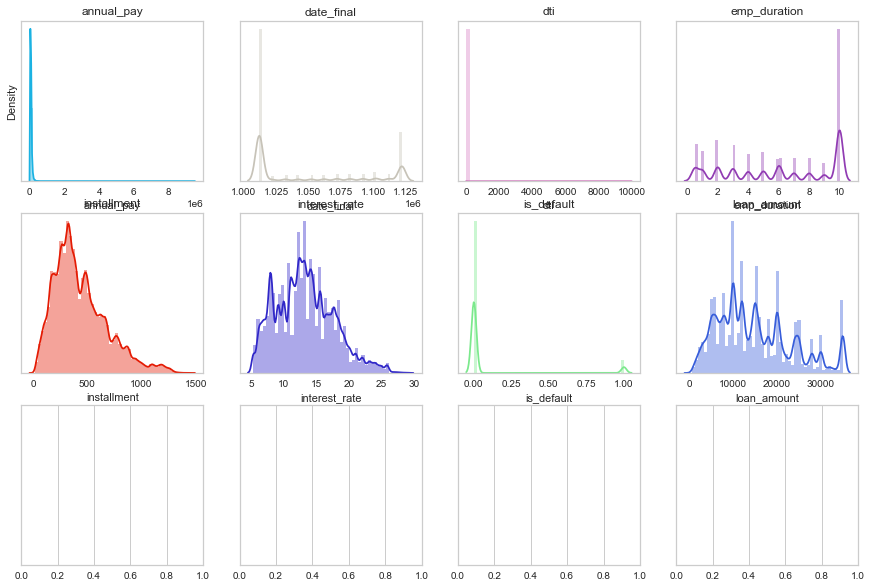

In [56]:
import matplotlib.pyplot as plt
import random
fig , axes = plt.subplots(nrows = 3 ,ncols = 4, sharex = False , figsize = (15, 10))
colors = []
for i in range(12):
  colors.append('#%06x' % random.randint(0, 0xFFFFFF))
columns = ['annual_pay', 'date_final','dti', 'emp_duration', 'installment' , 'interest_rate', 'is_default', 'loan_amount', 'recoveries'
          'loan_amount', 'recoveries', 'total_pyment','total_rec_prncp', 'year']
for ax , col, color in zip(axes.flat, columns, colors):
    sns.distplot(a=data[col] , bins=50, ax = ax, color=color )
    ax.set_title(col)
    plt.setp(axes, yticks=[])
    ax.grid(False)
plt.tight_layout()
plt.show()

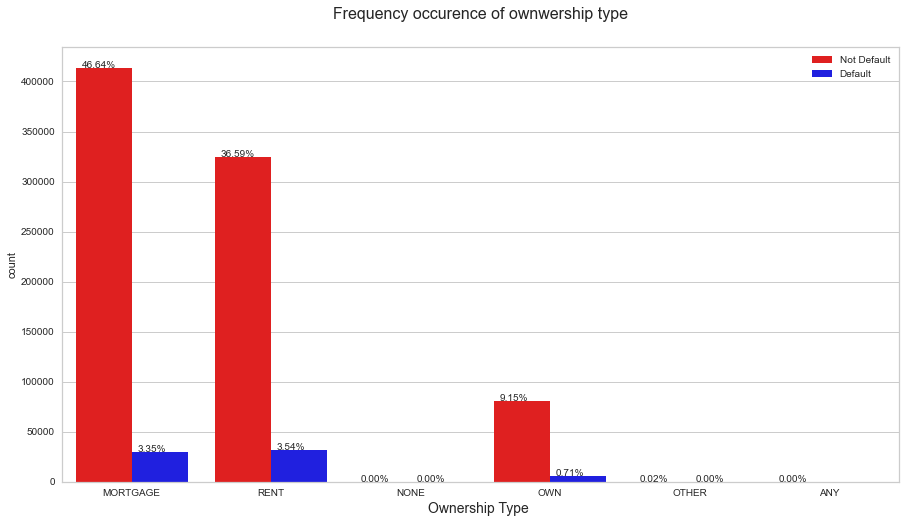

In [57]:
figure = plt.figure(figsize=[15,8])
ax=sns.countplot( x = 'own_type' , data = data ,hue = 'is_default'  , palette=['red', 'blue'] )
#total= data.shape[0]
for p in ax.patches:
    percentage= ('{:.2f}%'.format(100*p.get_height()/total))
    x=p.get_x() + p.get_width() / 10
    y=p.get_y() + p.get_height() + 2
    ax.annotate(percentage, (x, y))
plt.yticks=(range(0,500000 , 200000))
plt.xlabel('Ownership Type ' , size = 14)
plt.legend(labels = ['Not Default' , 'Default'] , loc = 'upper right')
plt.title('Frequency occurence of ownwership type' , y = 1.05, size = 16)
plt.show()
    

In [72]:
print('Before Filtering Shape:' , data.shape)
data=data[(data['own_type']== 'MORTGAGE') |( data['own_type']== 'RENT') | (data['own_type'] =='OWN')]
print('After Filtering Shape:',data.shape)

Before Filtering Shape: (887379, 22)
After Filtering Shape: (887144, 22)


In [ ]:
#Frequency 